## Milestone 1: Data Selection and EDA {-}

### Narrative {-}

I had a close family member die from cancer last year.  I was searching for a dataset regarding survival rates or along a similar line.  I found a dataset on kaggle provided by the World Health Organization (WHO) that includes information from around the world on life expectancies.  I found the data really interesting because I thought I could answer many interesting questions, not only about life expectancy, but the dataset contains a lot of financial information and I was curious about general spending about healthcare around the world.  

The business question I will answer is “what factors contribute most to low life expectancy rates around the world? Possible factorses could include government spending, population, average income (measured by Gross National Domestic Product , access to doctors, or othereatures discovered during researchrs.


In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
who_ds = pd.read_csv('who_life_exp.csv')
who_ds.head(n=5)

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


There are multiple years of data per country, so for the first milestone I will just take the most recent year.  I think I'll be able to derive some features (e.g. average increase per year) from the yearly information by country.

In [7]:
latest = who_ds.sort_values(by=['country', 'year'])
latest = latest.groupby('country').last().reset_index()
latest.head(5)

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Afghanistan,AFG,Eastern Mediterranean,2016,62.68935,16.29114,245.22490,0.055645,0.004715,0.01652,...,10.96198,35383.032,51.2,63.763,0.1,1910.0,NaN,4.22836,31.74112,NaN
1,Albania,ALB,Europe,2016,76.37373,20.76657,96.40514,0.010970,0.000370,4.66796,...,NaN,2886.438,8.2,78.194,NaN,12060.0,1.1,3.96209,97.24697,10.14573
2,Algeria,DZA,Africa,2016,76.36365,21.92010,95.02545,0.021830,0.000905,0.59923,...,6.60384,40551.392,21.0,76.298,0.1,14900.0,0.5,4.33702,75.13605,7.40254
3,Angola,AGO,Africa,2016,62.63262,17.34829,237.96940,0.057900,0.007520,5.38006,...,2.71315,28842.489,55.5,59.925,1.9,6410.0,30.1,3.42132,66.03011,3.99596
4,Antigua and Barbuda,ATG,Americas,2016,74.99754,19.69245,119.86570,0.004910,0.000930,7.54669,...,4.35730,94.527,5.4,76.617,NaN,22580.0,NaN,2.51724,98.95000,NaN


### Graphical Analysis {-}

#### Identify if there are any countries that are outliers  {-}
Determine if there are any countries that have extremely high and extremely low expectancy rates so that the results aren't skewed

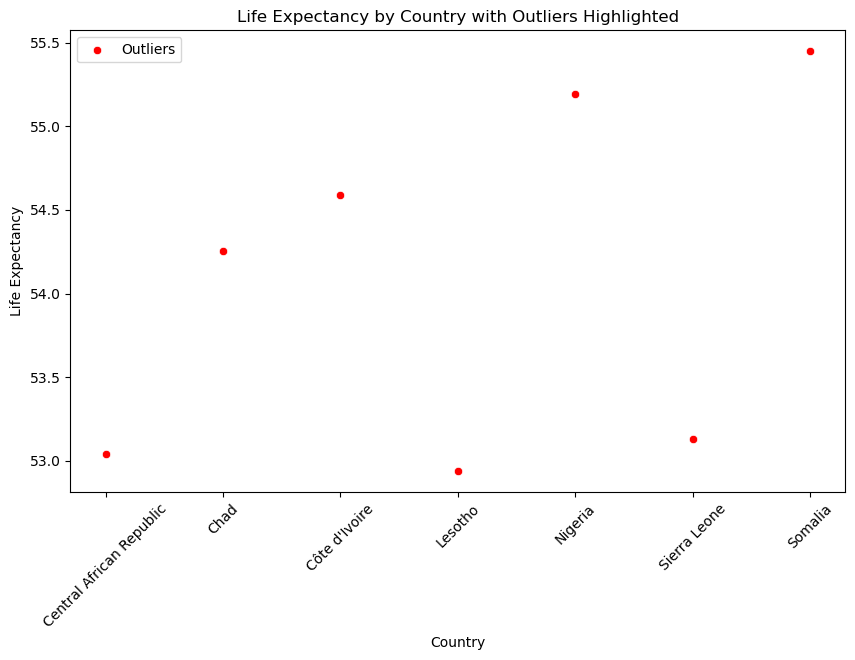

In [10]:
mean = latest['life_expect'].mean() 
std_dev = latest['life_expect'].std()

# Calculate Z-scores and find outliers
latest['z_score'] = (latest['life_expect'] - mean) / std_dev 
outliers = latest[(latest['z_score'] > 2) | (latest['z_score'] < -2)] 

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=outliers, x='country', y='life_expect', color='red', label='Outliers')
plt.xticks(rotation=45)
plt.xlabel('Country') 
plt.ylabel('Life Expectancy') 
plt.title('Life Expectancy by Country with Outliers Highlighted') 
plt.legend() 
plt.show()

There are only a few outliers that have low life expectancy rates.  Interesting observation is that all of them are on the continent of Africa.

#### Determine Possible Correlation  {-}
Which factors are highly correlated (but not proved causitive yet) to life expectancy?

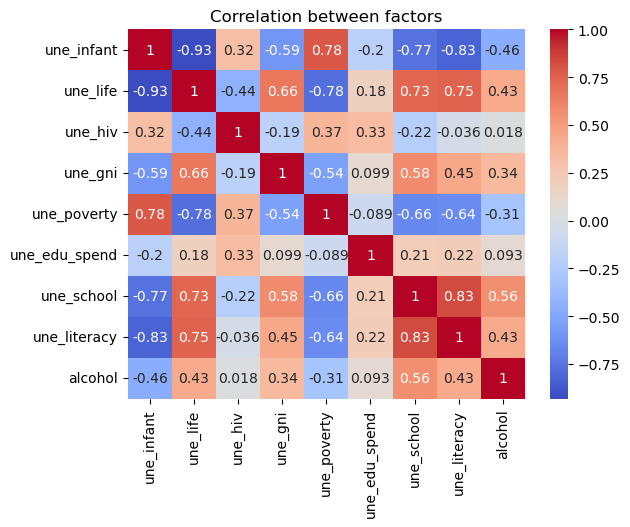

In [13]:
continuous_vars = latest[['une_infant','une_life','une_hiv','une_gni','une_poverty','une_edu_spend','une_school', 'une_literacy', 'alcohol']]
sns.heatmap(continuous_vars.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between factors')
plt.show()

The first obvious correlation  appears to be  stronga positive correlation between infant mortality and poverty rates.  There is also a strong negative correlation between literacy rates and infant mortality. .

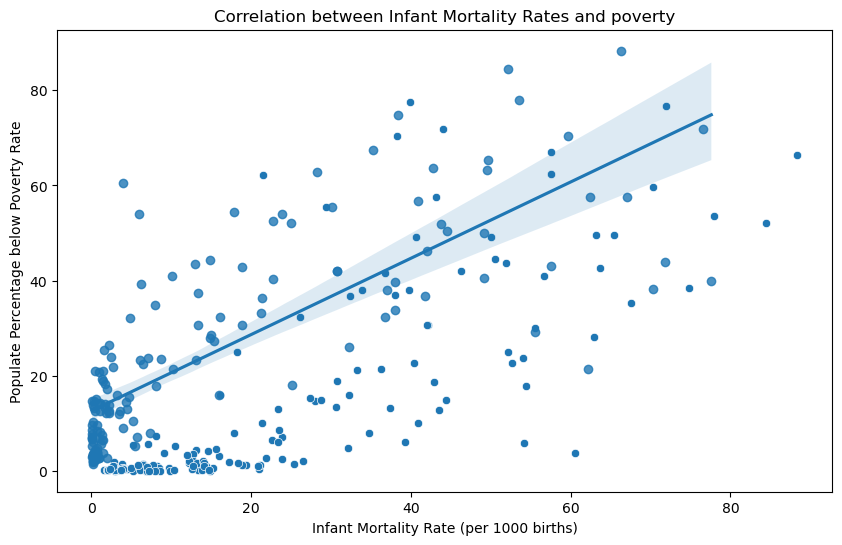

Correlation coefficient: 0.7842876318347525


In [15]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=latest, x='une_infant', y='une_poverty') 
sns.regplot(data=latest, y='une_infant', x='une_poverty')
plt.xlabel('Infant Mortality Rate (per 1000 births)')
plt.ylabel('Populate Percentage below Poverty Rate') 
plt.title('Correlation between Infant Mortality Rates and poverty')
plt.show() 

# Calculate the correlation coefficient
correlation = latest['une_infant'].corr(latest['une_poverty']) 
print(f'Correlation coefficient: {correlation}')

This scatterplot with a regression line shows the clear positive correlation between poverty rates and infant mortality.

#### Health Spending Trends  {-}


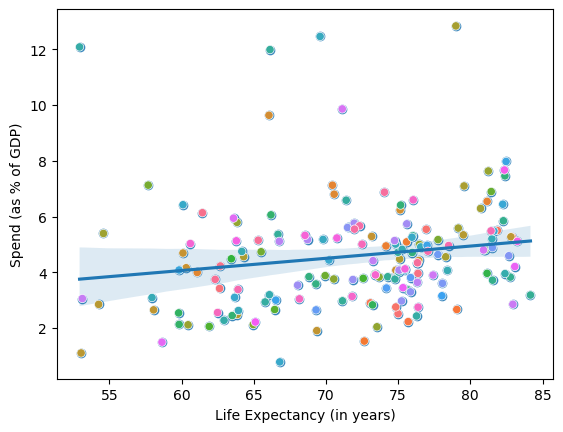

In [18]:
expenditure_and_expectancy = latest[['country', 'life_expect', 'une_edu_spend']]

sns.regplot(data=expenditure_and_expectancy, y='une_edu_spend', x='life_expect')
sns.scatterplot(data=expenditure_and_expectancy, x='life_expect', hue='country', y='une_edu_spend', legend=False)
plt.ylabel('Spend (as % of GDP)')
plt.xlabel('Life Expectancy (in years)')
plt.show()

There is a slight positive correlation in life expectancy and the percentage of country's income spent on healthcare.

### Overview  {-}

The charts above confirm a mostly common sense assumption that lower income and higher poverty rates correlate to lower life expectancy and higher infant mortality rates.  It also confirmed that the worst cases of this occur on the continent of Africa.  One thing that I expected to see, but did not, was a strong correlation between alcohol and life expectancy. Since it's "dry January" in many places in the United States, and there is a general decline in the use of alcohol because of negative health effects, I expected to see a stronger correlation.

## Milestone 2: Data Preparation {-}

### Summary {-}
My data was almost all continuous variables so I didn't have to do a ton of feature transformation.  The most interesting thing about this dataset was that it contained data by country and year.  There were a few columns that were sparsely populated so those were removed.  Since I am not necessarily interested in the change in a single area over time, I had to decide how to pivot the table to deal with the year.  So, I decided to fill all the NaNs with the previous year's value (and then backfill in case the previous years were all NaN) and then take a mean() of each column.

In [24]:
import janitor

# Use janitor to get a consistent naming convention for all the columns
who_ds = who_ds.clean_names()

In [25]:
# Drop columns that aren't relevant to the model
who_ds = who_ds.drop(columns=['country_code', 'region'])

In [26]:
# Determine which columns, if any, are sparsely populated
nan_percentage = who_ds.isna().mean() * 100
columns_above_threshold = nan_percentage[nan_percentage > 50].index
print('Columns with NaN percentage above threshold:', columns_above_threshold)

Columns with NaN percentage above threshold: Index(['hospitals', 'une_poverty', 'une_literacy', 'une_school'], dtype='object')


After going back to the data source and reading about the provenance for this columns, it appears that these data points are not always reported by the country.  This seems to be more prevalent in poorer countries, but is not universal, so I will drop these columns as well.

In [28]:
who_ds = who_ds.drop(columns=['hospitals', 'une_poverty', 'une_literacy', 'une_school'])

In [29]:
# For the remaining columns, sort by year and replace the values with the previous year's value
who_ds = who_ds.sort_values(by=['country', 'year'])
columns_to_fill =  [c for c in who_ds.columns.tolist() if c not in ['country', 'year']]

for c in columns_to_fill:
    # Group by country and use shift to get the previous year's data
    who_ds[c] = who_ds.groupby('country')[c].fillna(method='ffill')

    # Just in case the first year is empty, fill in the previous ones with a backfill method
    who_ds[c] = who_ds[c].fillna(method='bfill')  

Since we aren't necessarily examining the change in a single country over time, create just a single row for each country with the mean of each value

In [109]:
features = who_ds.groupby('country').mean().reset_index()
features = features.drop(columns=['country', 'year'])

#  the defintion in the dataset says that `une_life` is the response variable.  however, it looks like some of the features are redundant, and might be an example of data leakage about, so drop the other features
features = features.drop(columns=['life_expect', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1_4mort'])

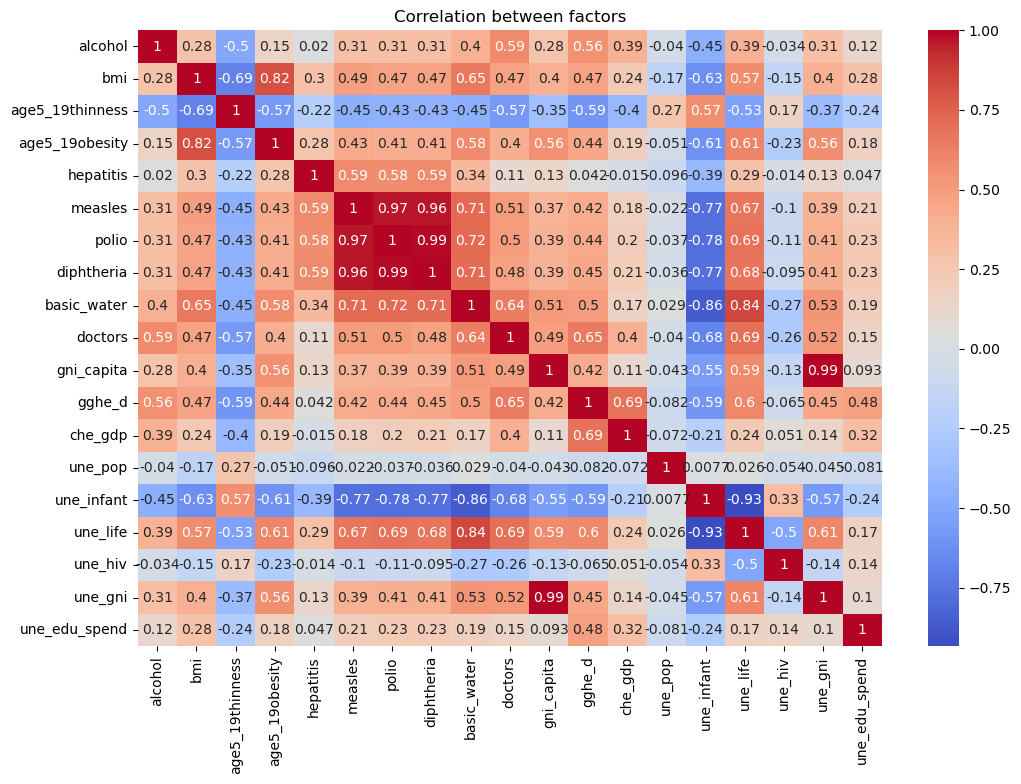

In [111]:
# Rexamine correlations and drop any that have little to no correlation with the response variable
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between factors')
plt.show()

In [113]:
# The following features have very little correlation to `une_life` so drop those.
features = features.drop(columns=['une_pop', 'hepatitis', 'che_gdp', 'une_edu_spend', 'alcohol', 'une_hiv'])

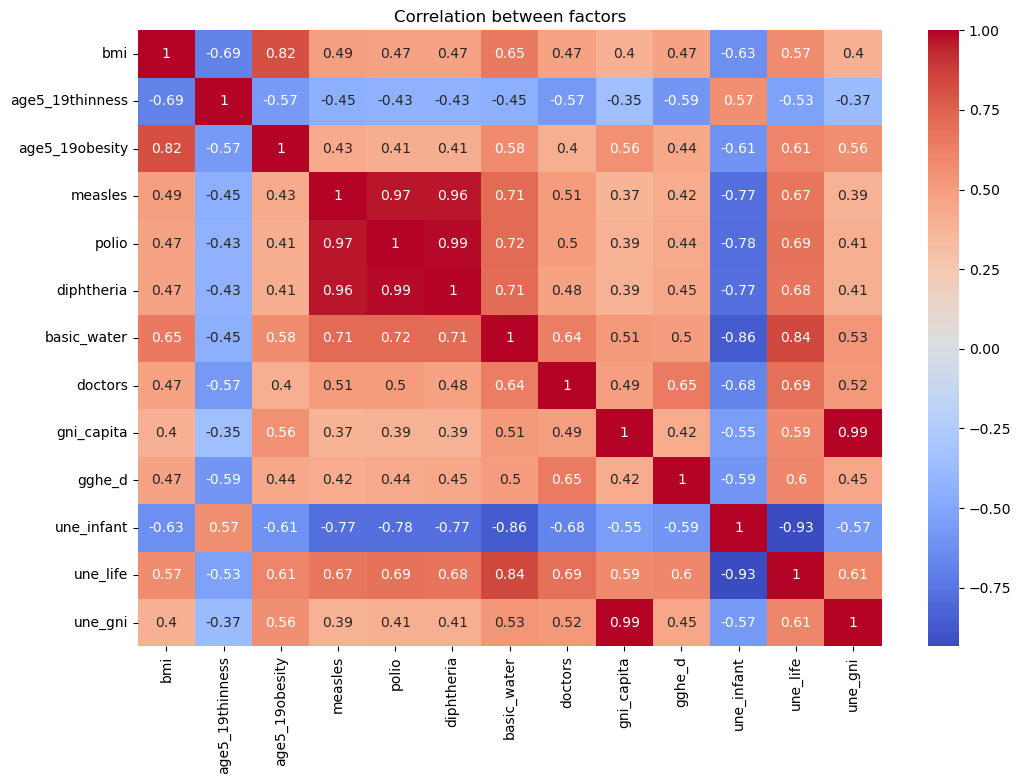

In [115]:
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between factors')
plt.show()

In [117]:
features.head(n=10)

,bmi,age5_19thinness,age5_19obesity,measles,polio,diphtheria,basic_water,doctors,gni_capita,gghe_d,une_infant,une_life,une_gni
0,22.517647,18.976471,1.623529,52.470588,56.529412,55.764706,44.112401,2.197706,1400.588235,0.440028,69.976471,59.891000,1597.647059
1,25.905882,1.682353,4.435294,96.764706,98.117647,98.058824,88.526418,12.357176,8092.352941,3.541575,14.476471,76.084294,8070.000000
2,24.905882,6.094118,9.258824,89.352941,91.705882,91.823529,91.848525,11.879176,11059.411765,3.388649,26.376471,73.943529,11571.764706
3,22.564706,9.623529,1.258824,48.647059,36.470588,49.058824,48.559092,0.946647,4967.058824,1.599865,87.082353,53.240824,4911.176471
4,25.900000,3.417647,7.864706,96.764706,96.352941,97.941176,97.362837,10.856765,18983.529412,2.784735,8.858824,75.428824,19621.176471
5,26.900000,1.035294,13.952941,94.352941,91.941176,92.352941,97.927125,33.812059,2380.000000,5.051979,13.588235,74.932294,15750.588235
6,25.964706,2.058824,3.400000,94.647059,94.294118,92.529412,97.611998,27.275176,5948.235294,1.471212,18.805882,73.091882,6214.117647
7,26.770588,0.658824,11.035294,93.823529,91.941176,92.058824,99.840925,29.970824,35472.352941,5.713366,4.235294,81.210759,36175.882353
8,25.311765,1.770588,7.117647,82.882353,86.058824,86.764706,100.000000,45.656118,37507.647059,7.184169,3.764706,80.076902,40064.117647
9,26.247059,2.923529,3.100000,81.000000,85.588235,83.176471,83.516508,35.526176,10660.588235,0.967523,38.705882,69.884176,10941.176471


## Milestone 3: Model Building and Evaluation {-}

### Decision Drivers: {-}
- My target variable is continuous (linear regression would work)
- XGBoost is especially effective on tabular data and often can outperform other models in terms of accuracy

#### Create a x/y and test/train split based on the data.  My target variable is `une_life` {-}


In [122]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

x = features.drop('une_life', axis=1) 
y = features['une_life']

x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Create pipelines and config for my two models {-}

In [125]:
def train_and_predict(pipeline, params, name):
    # User grid search to find the best parameters
    search = GridSearchCV(pipeline, params, cv=5)
    search.fit(x_train, y_train)
    
    # Get the best model
    best_model = search.best_estimator_
    print(f'Best {name} model: {best_model}')
    
    # Run predictions and get metrics/accuracy for this model
    y_pred = best_model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'Best {name} params: {search.best_params_}')
    print(f'{name} RMSE: {rmse}')
    print(f'R^2 Score: {r2}')

    return best_model 

In [139]:
# Start with Linear Regression
lr_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LinearRegression())
])

lr_params = {
    'lr__fit_intercept': [True, False], # use or don't use the intercept in the model
    'lr__copy_X': [True, False], # can X be overwritten
    'lr__positive': [True, False] # make coefficients positive
}

best_lr_model = train_and_predict(lr_pipeline, lr_params, 'Linear Regression')

Best Linear Regression model: Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LinearRegression())])
Best Linear Regression params: {'lr__copy_X': True, 'lr__fit_intercept': True, 'lr__positive': False}
Linear Regression RMSE: 3.218354187511006
R^2 Score: 0.8997742907727075


In [141]:
# Repeat for XGBoost
xgb_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgb', XGBRegressor())
])

xgb_params = {
    'xgb__n_estimators': [50, 100, 200],  # How many rounds of boosting? Linear relationship between performance and computational cost
    'xgb__max_depth': [3, 5, 7], # How deep does the tree go?  Too deep could cause overfitting
    'xgb__learning_rate': [0.01, 0.1, 0.2] # Helps to prevent overfitting.  Small values make model perform better but takes more boosting rounds
}

best_xgb_model = train_and_predict(xgb_pipeline, xgb_params, 'XGBoost')

Best XGBoost model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
  

These results were nearly identical (and with very excellent R^2 scores), so I thought I would try one more algorithm to see if I could get a very different result. I chose a RandomForestRegressor because it's typically resistant to overfitting (which is what I'm concerned with in the linear and XGB examples). 

In [143]:
# Repeat for RandomForest
rf_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestRegressor())
])

# Define the parameter grid for GridSearchCV
rf_params = {
    'rf__n_estimators': [50, 100, 200],  # How many trees in the forest? Linear relationship between computation time and accuracy
    'rf__max_depth': [None, 10, 20, 30],  # How deep does the tree go?  Too deep could cause overfitting
    'rf__min_samples_split': [2, 5, 10],  # How many samples do i need before I can split a node? Larger numbers can help with overfitting
    'rf__bootstrap': [True, False] # Do I use samples to build trees, or rebuild the dataset for each tree
}

best_rf_model = train_and_predict(rf_pipeline, rf_params, 'Random Forest')


Best Random Forest model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf', RandomForestRegressor(max_depth=30))])
Best Random Forest params: {'rf__bootstrap': True, 'rf__max_depth': 30, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Random Forest RMSE: 3.1659343830991635
R^2 Score: 0.9030126078357832


### Overview {-}

I evaluated three different algorithms.  Below are some of the advantages/disadvantages of each algorithm, and how it applies to my dataset:

 - Linear Regression
   - Advantages: Simple, fast
   - Disadvantages: Assumes linearity, heavily influenced by outliers
 - XGBoost
   - Advantages: Typically higher accuracy, efficient processing
   - Disadvantages: Complicated (I fiddled with hyperparameters and couldn't exactly tell which values were most important)
 - Random Forest
   - Advantages: Good at preventing overfitting, flexible
   - Disadvantages: Can be difficult to interpret the overall ensemble, expensive processing

All three of the algorithms have very similiar performance and accuracy metrics.  The major difference betwen the three was computational cost.  Linear Regression happened very quickly (sub-second), but the other two algorithms took much longer.  In particular, the `bootstrap` parameter in RandomForest made fitting take almost a minute.  The cost doesn't matter in this particular situation, but in a larger dataset or something where the model needs to be run repeatedly (e.g. financial or stock analysis) then that cost really could matter.  I expect that my data is very clean, and there are no complex relationships to surface, which is why even the simplest of the algorithms (linear regression) had similar accuracy to the more complex options.